# Abstract
The effects of smoking on human health have been studied extensively by the medical community since the mid 20th century. Numerous relationships have been examined, including cancer rates as a function of smoking levels, the likelihood of nicotine addition given various genetic indicators, and infant birth defects resulting from smoking while pregnant. This study focuses on the association between maternal smoking and preterm labor and delivery.

The association between maternal smoking and prematrue birth-rate (defined as an infant birth weight less than 2.5 kilograms) first came to light in 1957$^{\textbf{1}}$. According to a 2001 study$^{\textbf{2}}$ published in the *American Journal of Epidemiology*, smoking during pregnancy is associated with reduced infant birth weight, preterm delivery, and increased perinatal mortality.

The aim of this study is to verify the association between maternal smoking and low infant birth weight by performing an exploratory data analysis on the *birthwt* data set of the R package, MASS. The data set consists of 189 patients that gave birth in 1986 at the Baystate Medical Center in Springfield, Massachusetts.

# Background Research and Question Development

In 1957, an association between maternal smoking and preterm labor and delivery came to light as medical studies identified a premature birth-rate (defined as birthweight <2500 g) in smoking mothers as nearly twice that of non-smokers$^{\textbf{1}}$.  
In fact, between the years 1957 and 1986, over 100 studies (comprising more than 500,000 births) were published demonstrating that children born to smoking mothers have lower birth weights$^{\textbf{2}}$.  

Data from the Smoking Cessation in Pregnancy project, a randomized trial conducted from 1987 through 1991 that included 5,572 women to define the functional relation between tobacco exposure and birth weight, revealed that the mean adjusted infant birth weight for women with low exposure to smoking who reduced their cigarette use was 201 grams heavier than that for light smokers whose cigarette consumption did not change$^{\textbf{2}}$.
A main conclusion that this data provided was that the detrimental effects of tobacco on the birth weight of infants occurs at less than 8 cigarettes per day$^{\textbf{2}}$.

The Ohio Department of Health conducted a study that involved live infants born to Ohio mothers from January 1 through Januart 30 1989$^{\textbf{3}}$. The analysis was restricted to singleton infants of white (n = 62,732) and black (n = 11,407) mothers. An infant was classified as having a low birth weight (LBW) if the birth weight was less than 2500 g ( less than 5 lbs 8 oz), having very low birth weight (VLBW) if the birth weight was less than 1500 g (less than 3 lbs 4 oz), and being born preterm if the gestational age was less than 37 weeks. Multiple logistic regression was used to control for factors that affect the risk for LBW and preterm delivery, including a mother's educational attainment (a measure of socioeconomic status), age, race, pre-pregnancy weight, weight gain, alcohol consumption during pregnancy, child's birth order, the month prenatal care began, and previous terminations of pregnancy.  

The study concluded that an estimated 20% of all LBW infants in the total Ohio population in the 6-month period of the study was attributable to maternal smoking. Similarly, more than 8% of all VLBW and more than 6% of all preterm deliveries were attributable to smoking.  

The following exploratory data analysis (EDA) on the *birthwt* data set will detail the relationships between low birth weight and a host of maternal indicators for 189 patients that gave birth in 1986 at the Baystate Medical Center in Springfield, Massachusetts. The main question that this EDA seeks to answer is:  


Of the 189 patients, is the average birth weight of children born to mothers who smoked during pregnancy less than the average birth weight of children born to mothers who did not smoke? If so, is the difference similar to the 201 gram difference estimated by the data from the Smoking Cessation in Pregnancy project$^{\textbf{2}}$?


# Tools Used in This Study
The software used for the analysis and document preparation in this study include, R$^{\textbf{4}}$, R Markdown$^{\textbf{5}}$, python$^{\textbf{6}}$, and the Jupyter iPhyton Notebook$^{\textbf{7}}$. The data set was obtained through the MASS package available on R CRAN. 

# Exploratory Data Analysis
## Details of the *birthwt* Data Frame
This data set consists of 189 patients (rows) that gave birth in 1986 at the Baystate Medical Center in Springfield, Massachusetts. The following 10 variables (columns) were recored for each patient:



|**Variable**|**Description**|
|:-----------|:--------------|
|low| Indicator of birth weight less than 2.5 kg (1 = yes, 0 = no)| 
|age| Mother's age in years | 
|lwt| Mother's weight in pounds as last menstrual period | 
|race| Mother's race (1 = white, 2 = black, 3 = other)  |
|smoke| Smoking status during pregnancy (1 = yes, 0 = no)|  
|ptl| Number of previous premature labors  |
|ht| History of hypertension (1 = yes, 0 = no)|  
|ui| Presence of uterine irritability (1 = yes, 0 = no) | 
|ftv| Number of physican visits during the first trimester  |
|bwt| Birth weight in grams|


In [1]:

import pandas as pd
import numpy as np
import matplotlib as mpl
from ggplot import *
from statsmodels.graphics.mosaicplot import *
import matplotlib.pyplot as plt
from pylab import *
%matplotlib notebook
%matplotlib inline 
from IPython.core.display import display, Javascript

# Load data 
my_df = pd.read_csv("birthwt.csv")
# Use as dataframe
my_df = pd.DataFrame(my_df)
# Print dataframe
my_df

# Update 'low', 'race', 'smoke', 'ht', 'ui' column values to be more describtive
my_df['low'] = my_df['low'].replace(0,'No').replace(1,'Yes')
my_df['race'] = my_df['race'].replace(1,'White').replace(2,'Black').replace(3,'Other')
my_df['smoke'] = my_df['smoke'].replace(0,'No').replace(1,'Yes')
my_df['ht'] = my_df['ht'].replace(0,'No').replace(1,'Yes')
my_df['ui'] = my_df['ui'].replace(0,'No').replace(1,'Yes')

# Information about the dataset
my_df.shape


(189, 10)

In [2]:
my_df.dtypes


low      object
age       int64
lwt       int64
race     object
smoke    object
ptl       int64
ht       object
ui       object
ftv       int64
bwt       int64
dtype: object

In [3]:
my_df.head(10)

,low,age,lwt,race,smoke,ptl,ht,ui,ftv,bwt
0,No,19,182,Black,No,0,No,Yes,0,2523
1,No,33,155,Other,No,0,No,No,3,2551
2,No,20,105,White,Yes,0,No,No,1,2557
3,No,21,108,White,Yes,0,No,Yes,2,2594
4,No,18,107,White,Yes,0,No,Yes,0,2600
5,No,21,124,Other,No,0,No,No,0,2622
6,No,22,118,White,No,0,No,No,1,2637
7,No,17,103,Other,No,0,No,No,1,2637
8,No,29,123,White,Yes,0,No,No,1,2663
9,No,26,113,White,Yes,0,No,No,0,2665


In [4]:
# Statistical summary of dataset
my_df.describe()


,age,lwt,ptl,ftv,bwt
count,189.000000,189.000000,189.000000,189.000000,189.000000
mean,23.238095,129.814815,0.195767,0.793651,2944.587302
std,5.298678,30.579380,0.493342,1.059286,729.214295
min,14.000000,80.000000,0.000000,0.000000,709.000000
25%,19.000000,110.000000,0.000000,0.000000,2414.000000
50%,23.000000,121.000000,0.000000,0.000000,2977.000000
75%,26.000000,140.000000,0.000000,1.000000,3487.000000
max,45.000000,250.000000,3.000000,6.000000,4990.000000


In [5]:
# The variance of different variables
my_df.var()

age        28.075988
lwt       935.098503
ptl         0.243386
ftv         1.122087
bwt    531753.488349
dtype: float64

In [6]:
# The mean absolute deviation of different variables
my_df.mad()

age      4.259007
lwt     22.504017
ptl      0.329386
ftv      0.839842
bwt    591.031158
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10416da20>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11a49fb00>]], dtype=object)

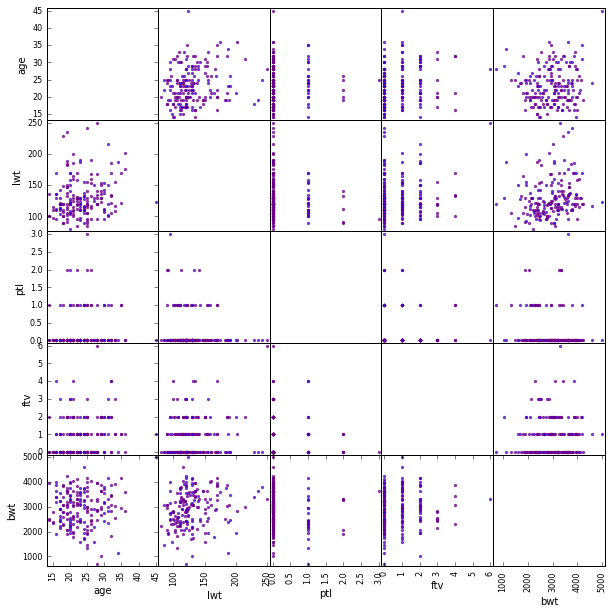

In [7]:
## Visualization 
# Matrix view
pd.scatter_matrix(my_df, alpha=0.7, figsize=(10,10), diagonal=' ', color = 'purple')

/Users/askar/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


(<matplotlib.figure.Figure at 0x11ab72470>,
 OrderedDict([(('Black', 'No LBW'),
               (0.0, 0.0, 0.13355935686032774, 0.57121096725057119)),
              (('Black', 'LBW'),
               (0.0,
                0.5811119573495811,
                0.13355935686032774,
                0.41888804265041896)),
              (('Other', 'No LBW'),
               (0.14812246365644427,
                0.0,
                0.34417218883238304,
                0.62065908083345656)),
              (('Other', 'LBW'),
               (0.14812246365644427,
                0.63056007093246647,
                0.34417218883238304,
                0.36943992906753359)),
              (('White', 'No LBW'),
               (0.5068577592849438,
                0.0,
                0.4931422407150563,
                0.75288778877887785)),
              (('White', 'LBW'),
               (0.5068577592849438,
                0.76278877887788776,
                0.4931422407150563,
                0.237

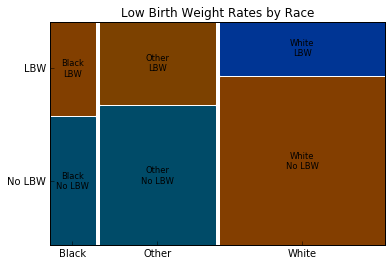

In [8]:
# Mosaic showing Low Birth Weight Rates by Race
my_df_forMosaicRace = my_df[['low','race']]
my_df_forMosaicRace['low'] = my_df_forMosaicRace['low'].replace('No', "No LBW").replace('Yes', "LBW")
my_df_forMosaicRace
mosaic(my_df_forMosaicRace, ['race', 'low'], statistic= True, gap=0.015, title='Low Birth Weight Rates by Race', axes_label=True, horizontal = True) 


/Users/askar/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/askar/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(<matplotlib.figure.Figure at 0x11d3a3a20>,
 OrderedDict([(('Did not smoke', 'No HT'),
               (0.0, 0.0, 0.5994735058774467, 0.92983211364614726)),
              (('Did not smoke', 'HT'),
               (0.0,
                0.93973310374515717,
                0.5994735058774467,
                0.060266896254842856)),
              (('Smoked', 'No HT'),
               (0.6142518310005994,
                0.0,
                0.38574816899940045,
                0.92320042815092318)),
              (('Smoked', 'HT'),
               (0.6142518310005994,
                0.93310141824993309,
                0.38574816899940045,
                0.066898581750066868))]))

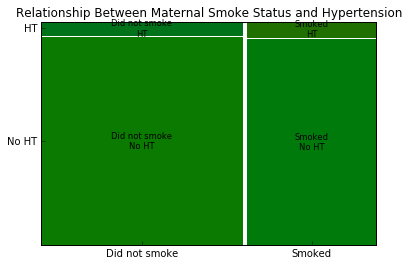

In [9]:
# Mosaic showing relationship between smoking while pregenancy and Hypertension
my_df_forMosaicSmoke = my_df[['smoke','ht']]
my_df_forMosaicSmoke['smoke'] = my_df_forMosaicSmoke['smoke'].replace('No', "Did not smoke").replace('Yes', "Smoked")
my_df_forMosaicSmoke['ht'] = my_df_forMosaicSmoke['ht'].replace('No', "No HT").replace('Yes', "HT")
mosaic(my_df_forMosaicSmoke, ['smoke', 'ht'], statistic= True, gap=0.015, title='Relationship Between Maternal Smoke Status and Hypertension')


/Users/askar/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


(<matplotlib.figure.Figure at 0x1040f1c18>,
 OrderedDict([(('Black', 'No HT'),
               (0.0, 0.0, 0.13355935686032774, 0.87585681645087576)),
              (('Black', 'HT'),
               (0.0,
                0.88575780654988567,
                0.13355935686032774,
                0.11424219345011427)),
              (('Other', 'No HT'),
               (0.14812246365644427,
                0.0,
                0.34417218883238304,
                0.93098862125018478)),
              (('Other', 'HT'),
               (0.14812246365644427,
                0.94088961134919469,
                0.34417218883238304,
                0.059110388650805326)),
              (('White', 'No HT'),
               (0.5068577592849438,
                0.0,
                0.4931422407150563,
                0.93853135313531344)),
              (('White', 'HT'),
               (0.5068577592849438,
                0.94843234323432335,
                0.4931422407150563,
                0.0515676

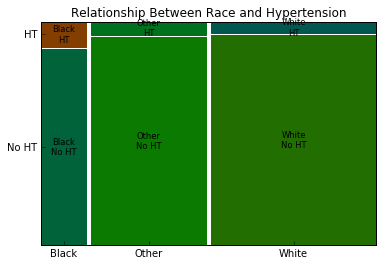

In [10]:
# Mosaic showing relationship between race and hypertension
my_df_forMosaic_rht = my_df[['ht','race']]
my_df_forMosaic_rht['ht'] = my_df_forMosaic_rht['ht'].replace('No', "No HT").replace('Yes', "HT")
my_df_forMosaic_rht
mosaic(my_df_forMosaic_rht, ['race', 'ht'], statistic= True, gap=0.015, title='Relationship Between Race and Hypertension', axes_label=True)


/Users/askar/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


(<matplotlib.figure.Figure at 0x11d7939e8>,
 OrderedDict([(('Black', 'UI'),
               (0.0, 0.0, 0.13355935686032774, 0.11424219345011424)),
              (('Black', 'No UI'),
               (0.0,
                0.12414318354912415,
                0.13355935686032774,
                0.87585681645087576)),
              (('Other', 'UI'),
               (0.14812246365644427,
                0.0,
                0.34417218883238304,
                0.17733116595241613)),
              (('Other', 'No UI'),
               (0.14812246365644427,
                0.18723215605142604,
                0.34417218883238304,
                0.81276784394857404)),
              (('White', 'UI'),
               (0.5068577592849438,
                0.0,
                0.4931422407150563,
                0.13407590759075907)),
              (('White', 'No UI'),
               (0.5068577592849438,
                0.14397689768976898,
                0.4931422407150563,
                0.85602310

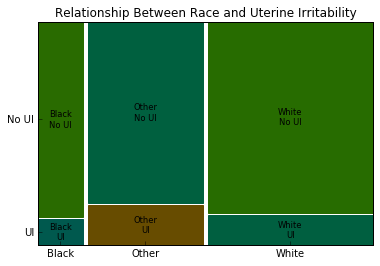

In [11]:
# Mosaic showing relationship Between Race and Uterine Irritability
my_df_forMosaic_ui = my_df[['ui','race']]
my_df_forMosaic_ui['ui'] = my_df_forMosaic_ui['ui'].replace('No', "No UI").replace('Yes', "UI")
my_df_forMosaic_ui
mosaic(my_df_forMosaic_ui, ['race', 'ui'],statistic= True,  gap=0.015, title='Relationship Between Race and Uterine Irritability')


In [12]:
# Count of different values in columns
my_df['low'].value_counts()
my_df['race'].value_counts()
my_df['smoke'].value_counts()
my_df['ht'].value_counts()
my_df['ui'].value_counts()

# Percentages of different races (white, black, other) in the race column
RaceCount = my_df['race'].value_counts('White')
RaceCount = RaceCount*100
RaceCount

White    50.793651
Other    35.449735
Black    13.756614
Name: race, dtype: float64

In [13]:
### To get the relationship between the race and the percentage of low birth weight
# Select "race" and "low" columns only
low_race_data = my_df[['low','race']]
low_race_data

## 1- For White women
# Filter to get only white values of the race column
w_value = ['White']
df_whites = low_race_data[low_race_data.race.isin(w_value)]
df_whites
# Selecting only white women who had low birth weight infant
W_Low = ['Yes']
df_whites_y = df_whites[df_whites.low.isin(W_Low)]
percent_w_y = (df_whites_y.count()/df_whites.count())*100
percent_w_y
# Selecting only white women who did not have low birth weight infant
W_NoLow = ['No']
df_whites_n = df_whites[df_whites.low.isin(W_NoLow)]
percent_w_n = (df_whites_n.count()/df_whites.count())*100

# Percent of white women who delivered low birth weight infants
percent_w_y[0]
# Percent of white women who delivered low birth weight infants is:

23.958333333333336

In [14]:
## 2- For Black women
# Filter to get only white values of the race column
b_vlaue = ['Black']
df_black = low_race_data[low_race_data.race.isin(b_vlaue)]
df_black
# Selecting only white women who had low birth weight infant
B_Low = ['Yes']
df_blacks_y = df_black[df_black.low.isin(B_Low)]
percent_b_y = (df_blacks_y.count()/df_black.count())*100
percent_b_y
# Selecting only black women who did not have low birth weight infant
B_NoLow = ['No']
df_blacks_n = df_black[df_black.low.isin(B_NoLow)]
percent_b_n = (df_blacks_n.count()/df_black.count())*100

# Percent of black women who delivered low birth weight infants
percent_b_y[0]
# Percent of black women who delivered low birth weight infants is:

42.307692307692307

In [15]:
## 3- For Other women
o_value = ['Other']
df_other = low_race_data[low_race_data.race.isin(o_value)]
df_other
# Selecting only other women who had low birth weight infant
O_Low = ['Yes']
df_other_y = df_other[df_other.low.isin(O_Low)]
percent_o_y = (df_other_y.count()/df_other.count())*100
percent_o_y
# Selecting only other women who did not have low birth weight infant
O_NoLow = ['No']
df_other_n = df_other[df_other.low.isin(O_NoLow)]
percent_o_n = (df_other_n.count()/df_other.count())*100

# Percent of other women who delivered low birth weight infants
percent_o_y[0]
# Percent of other women who delivered low birth weight infants is:

37.313432835820898

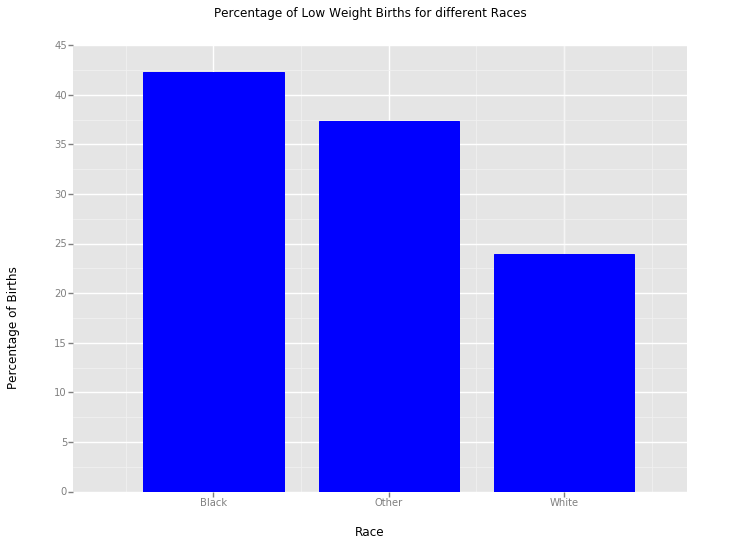

<ggplot: (300191068)>

In [16]:
# Race collective dataframe for plotting
race_dataF_1 = pd.Series([percent_w_y[0], percent_b_y[0], percent_o_y[0]],index=[1,2,3])
race_dataF_2 = pd.Series(["Yes", "Yes", "Yes"],index=[1,2,3])
race_dataF_3 = pd.Series(["White", "Black", "Other"],index=[1,2,3])
race_dataF = pd.DataFrame({"Race":race_dataF_3, "Low Birth Weight":race_dataF_2, "Percentage of Births": race_dataF_1})

# Plot of Percentage of low birth weight for different races
ggplot(race_dataF, aes(x='Race',y='Percentage of Births', weight = 'Percentage of Births')) + geom_bar(fill='blue') + xlab('Race') \
    + ylab('Percentage of Births') \
    + ggtitle('Percentage of Low Weight Births for different Races')


In [17]:
## For Smoke vs. Percentage of Births
# Filter on smoking women only
low_smk_data = my_df[['low','smoke','bwt']]
low_smk_data
smk_value = ['Yes']
df_smk_filtered = low_smk_data[low_smk_data.smoke.isin(smk_value)]
df_smk_filtered.count()

# Average infant birth weight for smoker mothers
Avg_BirthWeight_smk = average(df_smk_filtered[['bwt']])
Avg_BirthWeight_smk

2771.9189189189187

In [18]:
# Relationship between smoking women and low birth weight percentage
sm_y_low_y = ['Yes']
df_smk_low = df_smk_filtered[df_smk_filtered.low.isin(sm_y_low_y)]
df_smk_low.count()
df_smk_low_prctg = (df_smk_low.count()/df_smk_filtered.count())*100

# Percentage of smoking women and low birth weight percentage
df_smk_low_prctg[0]

40.54054054054054

In [19]:
# Filter on non-smoking women only
low_smk_data = my_df[['low','smoke','bwt']]
low_smk_data
nosmk_value = ['No']
df_nosmk_filtered = low_smk_data[low_smk_data.smoke.isin(nosmk_value)]
df_nosmk_filtered.count()

# Average infant birth weight for non-smoker mothers
Avg_BirthWeight_nosmk = average(df_nosmk_filtered[['bwt']])
Avg_BirthWeight_nosmk

3055.695652173913

In [20]:
# Relationship between smoking women and low birth weight percentage
sm_n_low_y = ['No']
df_nosmk_low = df_nosmk_filtered[df_nosmk_filtered.low.isin(sm_n_low_y)]
df_nosmk_low.count()
df_nosmk_low_prctg = (df_nosmk_low.count()/df_nosmk_filtered.count())*100

# Percentage of non-smoking women and low birth weight percentage
df_nosmk_low_prctg[0]

74.782608695652172

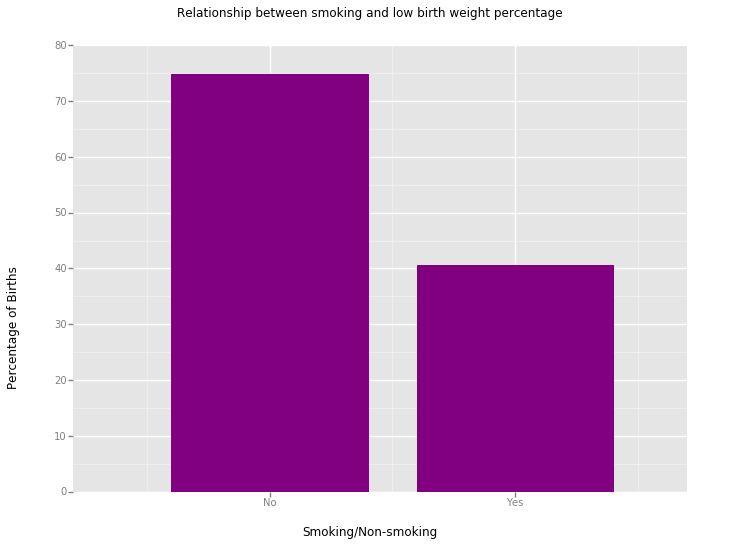

<ggplot: (299339363)>

In [21]:
# Collective dataframe for smoking for plotting 
smoke_data_1 = pd.Series([df_smk_low_prctg[0], df_nosmk_low_prctg[0]],index=[1,2])
smoke_data_2 = pd.Series(["Yes", "No"],index=[1,2])
smoke_df = pd.DataFrame({"Smoking":smoke_data_2, "Percentage of Births": smoke_data_1})


# Plot for relationship between smoking/non-smoking mothers and the percentage of low birth weight
ggplot(smoke_df, aes(x='Smoking',y='Percentage of Births', weight = 'Percentage of Births')) + geom_bar(fill='blue') + xlab('Smoking/Non-smoking') \
    + ylab('Percentage of Births') \
    + ggtitle('Relationship between smoking and low birth weight percentage') 



In [23]:
## For Hypertension vs. Percentage of Births
# Select relevant columns only
low_ht_data = my_df[['low','ht']]
low_ht_data
# Filter on mothers with hypertension
ht_value = ['Yes']
df_ht_filtered = low_ht_data[low_ht_data.ht.isin(ht_value)]
df_ht_filtered.count()

# Percentage of mothers that have hypertension and low infant birth weight
ht_y_low_y = ['Yes']
df_ht_low = df_ht_filtered[df_ht_filtered.low.isin(ht_y_low_y)]
df_ht_low.count()
df_ht_low_prctg = (df_ht_low.count()/df_ht_filtered.count())*100

# Filter on mothers with no hypertension
low_ht_data = my_df[['low','ht']]
low_ht_data
noht_value = ['No']
df_noht_filtered = low_ht_data[low_ht_data.ht.isin(noht_value)]
df_noht_filtered.count()

# Percentage of mothers that do not have hypertension but have low infant birth weight
ht_n_low_y = ['Yes']
df_noht_low = df_noht_filtered[df_noht_filtered.low.isin(ht_n_low_y)]
df_noht_low.count()
df_noht_low_perct = (df_noht_low.count()/df_noht_filtered.count())*100


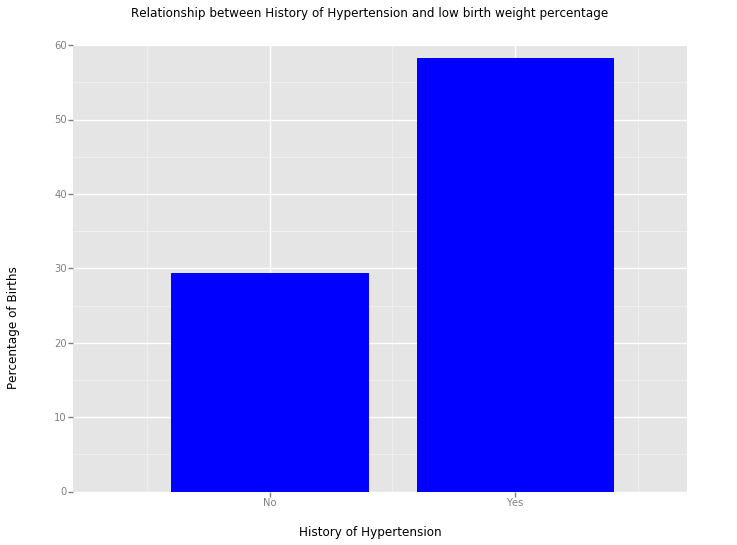

<ggplot: (300824342)>

In [24]:
# Collective dataframe for hypertension vs percetage of low birth weight for plotting
ht_data_1 = pd.Series([df_ht_low_prctg[0], df_noht_low_perct[0]],index=[1,2])
ht_data_2 = pd.Series(["Yes", "No"],index=[1,2])
ht_df = pd.DataFrame({"History of Hypertension":ht_data_2, "Percentage of Births": ht_data_1})
ht_df

# Plot for relationship between mothers with history of hypertension and the percentage of low birth weight
ggplot(ht_df, aes(x='History of Hypertension',y='Percentage of Births', weight = 'Percentage of Births')) + geom_bar(fill='blue') + xlab('History of Hypertension') \
    + ylab('Percentage of Births') \
    + ggtitle('Relationship between History of Hypertension and low birth weight percentage') 


In [25]:
## For Uterine Irritability vs. Percentage of Births
# Select only the relevant columns
ui_prctg_data = my_df[['low','ui']]
ui_prctg_data
# Filter on mothers with Uterine Irritability
ui_value = ['Yes']
df_ui_filtered = ui_prctg_data[ui_prctg_data.ui.isin(ui_value)]
df_ui_filtered.count()

# Percentage of mothers that have Uterine Irritability and low infant birth weight
ui_y_low_y = ['Yes']
df_ui_low = df_ui_filtered[df_ui_filtered.low.isin(ui_y_low_y)]
df_ui_low.count()
df_ui_low_perct = (df_ui_low.count()/df_ui_filtered.count())*100

# Filter on mothers with no Uterine Irritability
ui_prctg_data = my_df[['low','ui']]
ui_prctg_data
noui_value = ['No']
df_noui_filtered = ui_prctg_data[ui_prctg_data.ui.isin(noui_value)]
df_noui_filtered.count()

# Percentage of mothers that do not have Uterine Irritability but have low infant birth weight
ui_n_low_y = ['Yes']
df_noui_low = df_noui_filtered[df_noui_filtered.low.isin(ui_n_low_y)]
df_noui_low.count()
df_noui_low_perct = (df_noui_low.count()/df_noui_filtered.count())*100

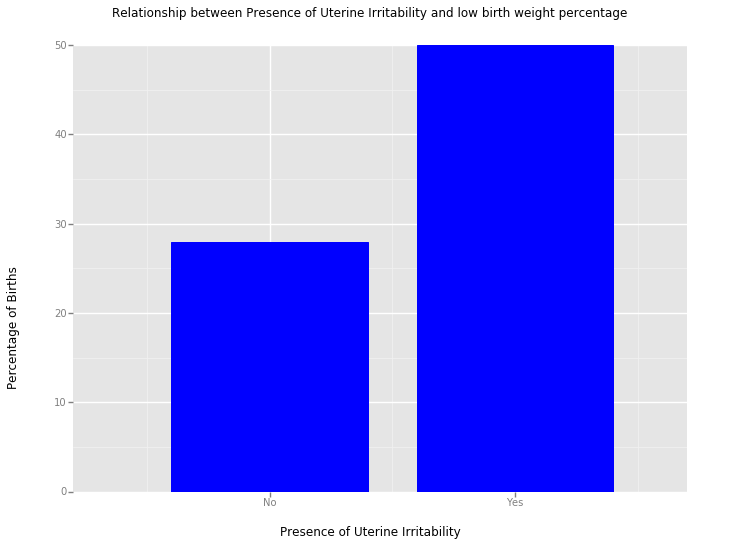

<ggplot: (300835890)>

In [26]:
# Collective dataframe for the relationship between the presence of Uterine Irritability and the low birth weight, for plotting
ui_data_1 = pd.Series([df_ui_low_perct[0], df_noui_low_perct[0]],index=[1,2])
ui_data_2 = pd.Series(["Yes", "No"],index=[1,2])
ui_df = pd.DataFrame({"Presence of Uterine Irritability":ui_data_2, "Percentage of Births": ui_data_1})
ui_df

# Plot for relationship between mothers with Uterine Irritability and the percentage of low birth weight
ggplot(ui_df, aes(x='Presence of Uterine Irritability',y='Percentage of Births', weight = 'Percentage of Births')) + geom_bar(fill='blue') + xlab('Presence of Uterine Irritability') \
    + ylab('Percentage of Births') \
    + ggtitle('Relationship between Presence of Uterine Irritability and low birth weight percentage') 


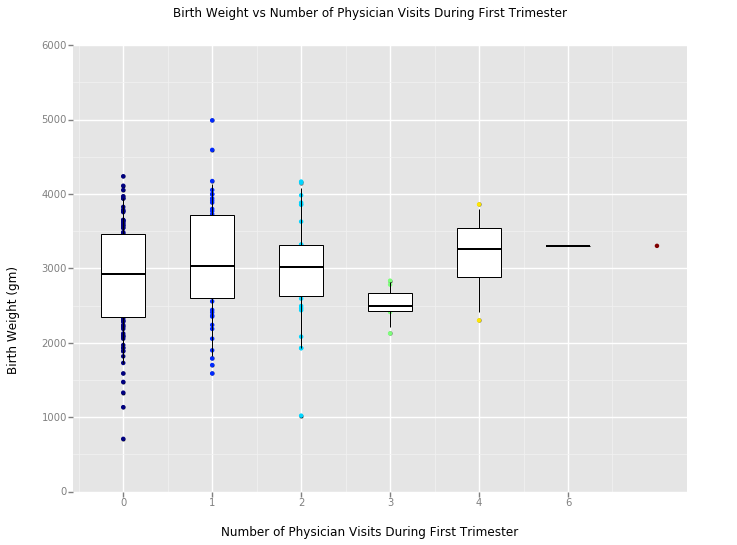

<ggplot: (300962936)>

In [27]:
## Plot: Relationship between the Infant Birth Weight and Number of Physician Visits by the mother
ftv_prctg_data = my_df[['bwt','ftv']]
ftv_prctg_data
ggplot(ftv_prctg_data, aes(x='ftv',y='bwt')) + geom_boxplot(fill='red') \
    + geom_point(color = ftv_prctg_data[['ftv']]) \
    + xlab('Number of Physician Visits During First Trimester') \
    + ylab('Birth Weight (gm)') \
    + ggtitle('Birth Weight vs Number of Physician Visits During First Trimester') 


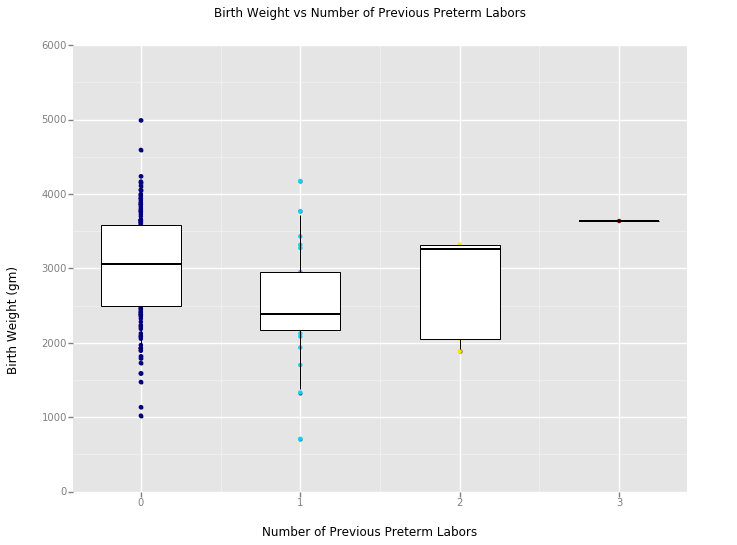

<ggplot: (-9223372036553788514)>

In [28]:
## Plot: Relationship between the Infant Birth Weight and the Number of Previous Preterm Labors of the mother
prtrm_prctg_data = my_df[['bwt','ptl']]
prtrm_prctg_data
ggplot(prtrm_prctg_data, aes(x='ptl',y='bwt')) + geom_boxplot(fill = True) \
    + geom_point(color = prtrm_prctg_data[['ptl']]) \
    + xlab('Number of Previous Preterm Labors') \
    + ylab('Birth Weight (gm)') \
    + ggtitle('Birth Weight vs Number of Previous Preterm Labors') 


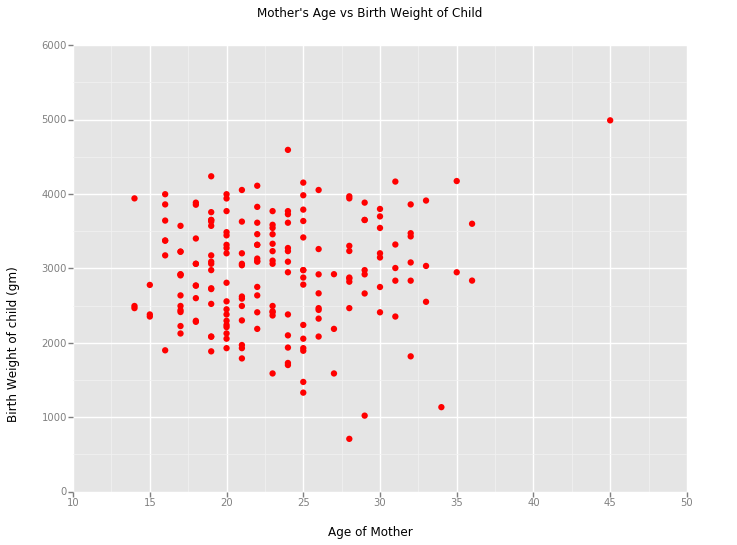

<ggplot: (300984005)>

In [29]:
## Plot: Relationship between the Maternal Age and the Infant's Birth Weight
age_data = my_df[['bwt','age']]
ggplot(age_data, aes(x='age',y='bwt')) + geom_point(color = 'red', size = 40) + xlab('Age of Mother') \
    + ylab('Birth Weight of child (gm)') \
    + ggtitle("Mother's Age vs Birth Weight of Child") 


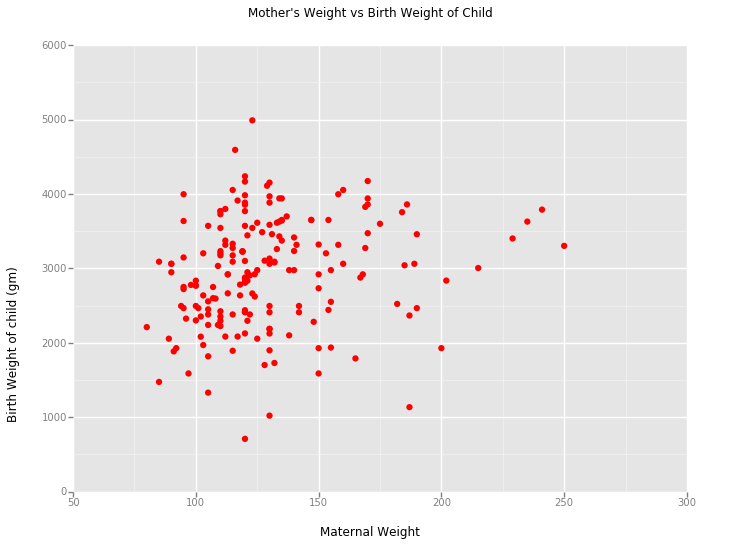

<ggplot: (301297321)>

In [30]:
## Plot: Relationship between the Mother's weight and the Infant's Birth Weight
weight_data = my_df[['bwt','lwt']]
ggplot(weight_data, aes(x='lwt',y='bwt')) + geom_point(color = 'red', size = 40) + xlab('Maternal Weight') \
    + ylab('Birth Weight of child (gm)') \
    + ggtitle("Mother's Weight vs Birth Weight of Child") 


# Conclusion
The observed difference in average birth weights for infants born to mothers who smoked during pregnancy and mothers who
did not was -283.78 grams, similar to the results found with the data from the Smoking Cessation in Pregnancy project. In
the birthwt data set, mothers who did not smoke during pregnancy, on average, gave birth to infants weighing 283.78 grams
more than mothers who smoked.


In [31]:
Diff = Avg_BirthWeight_smk-Avg_BirthWeight_nosmk
AvgBW_1 = pd.Series([Avg_BirthWeight_smk, Avg_BirthWeight_nosmk, Diff ],index=[1,2,3])
AvgBW_2 = pd.Series(["Yes(n = 74)", "No(n = 115)", "Diff. in Average"],index=[1,2,3])
Avg_BW = pd.DataFrame({"Maternal Smoke Status":AvgBW_2, "Average Birth Weight (grams)":AvgBW_1})
Avg_BW

,Average Birth Weight (grams),Maternal Smoke Status
1,2771.918919,Yes(n = 74)
2,3055.695652,No(n = 115)
3,-283.776733,Diff. in Average


# References

1. Wickstrom, R. (2007). Effects of Nicotine During Pregnancy: Human and Experimental Evidence. Retrieved October
05, 2016, from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2656811/
2. Lucinda J. England 1, 2„ Juliette S. Kendrick 2„ Hoyt G. Wilson 3„ Robert K. Merritt 4„ & Paul M. Gargiullo 5 and.
(n.d.). Lucinda J. England. Effects of Smoking Reduction during Pregnancy on the Birth Weight of Term Infants.
Retrieved October 05, 2016, from http://aje.oxfordjournals.org/content/154/8/694.full
3. Morbidity and Mortality Weekly Report (MMWR)- Center for Disease Control. Effects of Maternal Cigarette Smoking
on Birth Weight and Preterm Birth-Ohio, 1989.
Retrieved October 08, 2016, from http://www.cdc.gov/mmwr/preview/mmwrhtml/00001782.htm
4. R Core Team (2015). R: A language and environment for statistical computing. R Foundation for Statistical Computing,
Vienna, Austria. URL https://www.R-project.org/.
5. R Markdown from RStudio. URL \href{http://rmarkdown.rstudio.com/index.html%7B%7Bhttp://rmarkdown.rstudio.
com/index.html%7D
6. Python Software Foundation. Python Language Reference, version 2.7. URL http://www.python.org
7. iPython Jupyter Notebook. URL http://jupyter.org/
8. http://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-matrix-plot
9. https://stat.ethz.ch/R-manual/R-devel/library/MASS/html/birthwt.html
10. http://statsmodels.sourceforge.net/0.6.0/generated/statsmodels.graphics.mosaicplot.mosaic.html
11. http://stackoverflow.com/questions/27225636/how-to-create-mosaic-plot-from-pandas-dataframe-with-statsmodels-library
12. http://statsmodels.sourceforge.net/devel/_modules/statsmodels/graphics/mosaicplot.html
13. https://github.com/yhat/ggplot
14. http://docs.ggplot2.org/current/aes_colour_fill_alpha.html
